# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [2]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [3]:
yelp.sample(n=3, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,0,1,0
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,0,1,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [4]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 'U' mode is deprecated


In [7]:
# show the first review
type(data)

list

In [8]:
# data[0:2]
# data[0].keys()     # dict_keys(['votes', 'user_id', 'review_id', 'stars', 'date', 'text', 'type', 'business_id'])
# data[0]['text']
data[0]['votes']    # {'cool': 2, 'funny': 0, 'useful': 5}

{'cool': 2, 'funny': 0, 'useful': 5}

In [9]:
# convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame.from_dict(data)
df.head(3)

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 5, 'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{'funny': 0, 'useful': 0, 'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{'funny': 0, 'useful': 1, 'cool': 0}"


In [12]:
df.sample(n=3, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,votes
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,"{'funny': 0, 'useful': 2, 'cool': 0}"
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,"{'funny': 0, 'useful': 1, 'cool': 0}"
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,"{'funny': 0, 'useful': 1, 'cool': 0}"


In [13]:
# add DataFrame columns for cool, useful, and funny
# type(df.votes)
# df.dtypes
# type(df.votes.values)   # numpy.ndarray
# df.votes[0]               # {'cool': 2, 'funny': 0, 'useful': 5}
df['cool'] = df.votes.map(lambda x : x['cool'])
df['cool']
df['useful'] = df.votes.map(lambda x: x['useful'])
df['funny'] = df.votes.map(lambda x: x['funny'])
df.sample(n=3, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,votes,cool,useful,funny
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,"{'funny': 0, 'useful': 2, 'cool': 0}",0,2,0
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,"{'funny': 0, 'useful': 1, 'cool': 0}",0,1,0
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,"{'funny': 0, 'useful': 1, 'cool': 0}",0,1,0


In [14]:
# drop the votes column and then display the head
df.drop('votes', axis=1).sample(n=3, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,0,1,0
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,0,1,0


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [15]:
# treat stars as a categorical variable and look for differences between groups 
# by comparing the means of the groups
cool_mean = df.groupby(['stars']).cool.mean()
useful_mean = df.groupby(['stars']).useful.mean()
funny_mean = df.groupby(['stars']).funny.mean()
df_mean_concat = pd.concat([cool_mean ,useful_mean, funny_mean], axis=1)
df_mean_concat

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


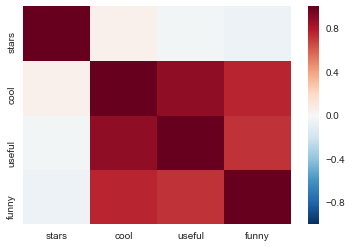

In [17]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

In [238]:
yelp.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


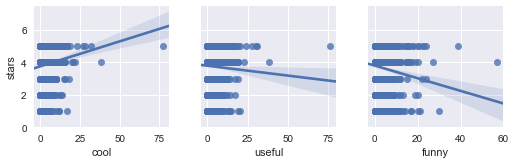

In [19]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
# To use seaborn for multiple plots:
import seaborn as sns; sns.set(color_codes=True)
feature_cols = ['cool', 'useful', 'funny']
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

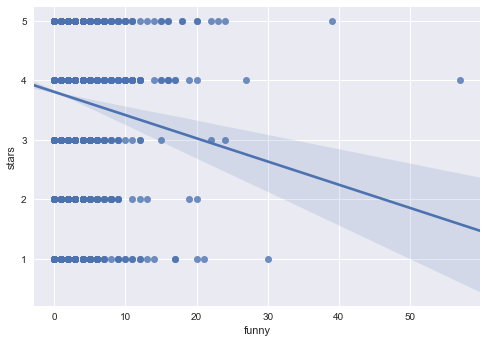

In [30]:
# To use seaborn for single plots:
sns.regplot(x='funny', y="stars", data=yelp)

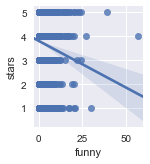

In [29]:
# To use seaborn for single plots:
sns.pairplot(yelp, x_vars='funny', y_vars='stars', kind='reg')

In [26]:
# To use matplotlib + scikit LinearRegression to achive the same
x = yelp.funny.values.reshape(-1, 1) 
y = yelp.stars.values

In [27]:
# To use matplotlib + scikit LinearRegression to achive the same
from sklearn.linear_model import LinearRegression as LinReg
reg = LinReg()    # Instantiate the LinearRegression()
reg.fit(x, y)
y_preds = reg.predict(x)

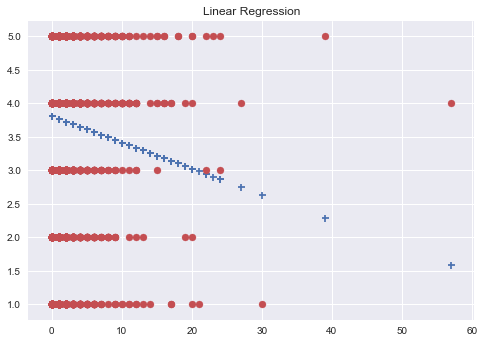

In [28]:
# To use matplotlib + scikit LinearRegression to achive the same for single plot
import matplotlib.pyplot as plt
plt.scatter(x = x, y = y_preds, marker='+',c = 'b')
plt.scatter(x = x, y = y, c = 'r')
plt.title("Linear Regression")

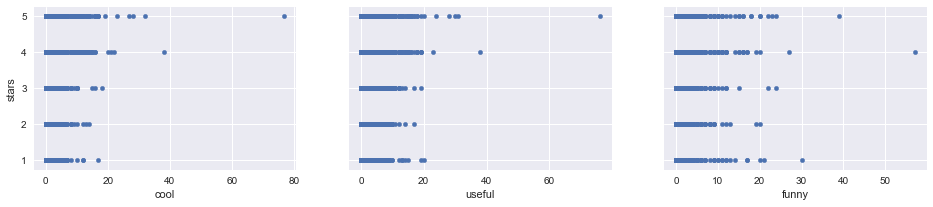

In [37]:
# multiple scatter plots in matplotlib, but can not get regression on the same plot
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)  # 1 rwo, 4 cols
for i, feature in enumerate(feature_cols):
    yelp.plot(kind='scatter', x=feature, y='stars', ax=axs[i], figsize=(16, 3))
#     plt.scatter(x = i, y = y_preds, marker='+',c = 'b')
#     plt.scatter(x = i, y = y, c = 'r')

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [38]:
feature_columns = ['cool', 'useful', 'funny']
X = yelp[feature_columns]
y = yelp.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [39]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [48]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [53]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X, y)                  # fit the model using whole set
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

def train_test_rmse_curious(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)       # fit the model using training set
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [57]:
# calculate RMSE with all three features
train_test_split(X, y, random_state=123)
print('Whole set to fit the model:', train_test_rmse(['cool','useful','funny']))
print('Training set to fit the model:', train_test_rmse_curious(['cool','useful','funny']))

1.17277465415


## Task 6

Try removing some of the features and see if the RMSE improves.

In [58]:
print('Whole set:', train_test_rmse(['cool','useful']))
print('Whole set:', train_test_rmse(['cool']))
print('Training set:', train_test_rmse_curious(['cool','useful']))
print('Training set:', train_test_rmse_curious(['cool']))

1.18535109713
1.20048513864


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [101]:
# profiling data to decide which column is good for additional feature
yelp.type.unique()
type(yelp.text)
print('length of review: ', len(yelp.iloc[3]['text']))
print('length of review: ', len(yelp.iloc[500]['text']))
yelp['length'] = yelp.text.str.len()

# yelp['length'] = len(yelp.text)        # initialize to the same len
# for i in range(0, yelp.shape[0]):
#     yelp.iloc[i]['length'] = len(yelp.iloc[i]['text'])

yelp.length

length of review:  419
length of review:  864


0        889
1       1345
2         76
3        419
4        469
5       2094
6       1565
7        274
8        349
9        186
10       298
11       321
12       433
13       593
14      1206
15       705
16      1469
17       363
18      1161
19       726
20       565
21       104
22       148
23       594
24       294
25      1012
26       921
27       550
28      1011
29       225
        ... 
9970     432
9971     318
9972     411
9973     353
9974     473
9975    1015
9976     465
9977    2918
9978     493
9979     244
9980     393
9981     885
9982     240
9983     861
9984    1673
9985      68
9986     647
9987     200
9988     496
9989      49
9990     263
9991     908
9992    1326
9993     426
9994    1968
9995     668
9996     881
9997    1425
9998     880
9999     461
Name: length, dtype: int64

In [102]:
yelp.sample(n=5, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,0,1,0,801
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,0,1,0,137
3886,3I8kUGzDOIKz95llTBhIjA,2011-03-26,TSNYg0TTPZWVOcycZliKlQ,5,I personally like this Fry's. I think most of ...,review,Aj5a_ik5B7sgaoJ6Jlj--Q,0,0,0,862
5437,KoJ4jNSmqYbmKqcoh-2dNA,2012-01-11,AOVQib06pMJF89eCLW3KIw,2,Successfully blending the idea of bar food and...,review,DV7z89n3cl2KubYFmRmdCw,0,2,0,219


In [103]:
# new feature:
new_feature_columns = ['cool', 'useful', 'funny', 'length']

In [104]:
# new features: 
X_2 = yelp[new_feature_columns]
y = yelp.stars

In [105]:
# add new features to the model and calculate RMSE
train_test_split(X_2, y, random_state=123)
print('Whole set to fit the model:', train_test_rmse(['cool','useful','funny','length']))

Whole set to fit the model: 1.16609630945


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [117]:
# examine the class distribution
y_test.value_counts()

4    907
5    821
3    349
2    249
1    174
Name: stars, dtype: int64

In [118]:
# compute null accuracy
y_test.value_counts().head(1) / len(y_test)

4    0.3628
Name: stars, dtype: float64